# Fractal Dimension

This notebooks runs fractal dimension measures on time series signals. 

This notebook covers fractal dimension and related measures, including:
- Correlation Dimension
- Higuchi Fractal Dimension
- Petrosian Fractal Dimension
- Katz Fractal Dimension

In [1]:
from neurodsp.sim import sim_powerlaw, sim_synaptic_current, sim_combined
from neurodsp.utils import set_random_seed

from neurodsp.aperiodic.conversions import convert_exponent_hfd

In [2]:
# Import custom code
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))

from apm.io import APMDB
from apm.run import run_sims, run_sims_load
from apm.methods import correlation_dimension, higuchi_fd, petrosian_fd, katz_fd
from apm.methods.settings import CD_PARAMS, HFD_PARAMS, KFD_PARAMS, PFD_PARAMS
from apm.plts.sims import plot_sims, plot_ap_sims, plot_pe_sims
from apm.plts.settings import EXT, COLORS
from apm.sim.settings import (N_SIMS, N_SIMS2, EXP, EXPS, KNEES, FREQS, POWERS, BWS,
                              SIM_PARAMS_AP, SIM_PARAMS_COMB, SIM_PARAMS_KNEE)
from apm.sim.examples import SIG_AP, SIG_KN, SIG_OSC, SIG_COMB

In [3]:
import seaborn as sns
sns.set_context('talk')

## Settings

In [4]:
# Set the random seed
set_random_seed(111)

In [5]:
# Settings for saving figures
SAVE_FIG = False
FIGPATH = APMDB().figs_path / '23_fractaldim'

In [6]:
# Settings for loading simulations
SIMPATH = APMDB().sims_path / 'time_series'

## Correlation Dimension

The correlation dimension is a measure of the dimensionality of the space of a set of points, which is considered to be a type of fractal dimension.

In [7]:
# Check correlation dimension measure parameters
print(CD_PARAMS)

{}


### Calculate Correlation Dimension on Example Signals

In [8]:
# Check correlation dimension measures on example signals
print('Correlation dimension:')
print('  powerlaw: \t {:1.4f}'.format(correlation_dimension(SIG_AP)))
print('  osc:      \t {:1.4f}'.format(correlation_dimension(SIG_OSC)))
print('  combined: \t {:1.4f}'.format(correlation_dimension(SIG_COMB)))
print('  knee:     \t {:1.4f}'.format(correlation_dimension(SIG_KN)))

Correlation dimension:
  powerlaw: 	 0.8992
  osc:      	 0.8166
  combined: 	 0.9635
  knee:     	 1.3081


### Correlation Dimension: Aperiodic Measures

In [9]:
# Run simulations calculating correlation dimension across exponents
cd_sims_exp, cd_sims_exp_var = run_sims(\
    sim_powerlaw, SIM_PARAMS_AP, correlation_dimension, CD_PARAMS, 'update_exp', EXPS, N_SIMS2)

In [10]:
# Run simulations calculating correlation dimension across exponents with an oscillation
cd_sims_comb, cd_sims_comb_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, correlation_dimension, CD_PARAMS, 'update_comb_exp', EXPS, N_SIMS2)

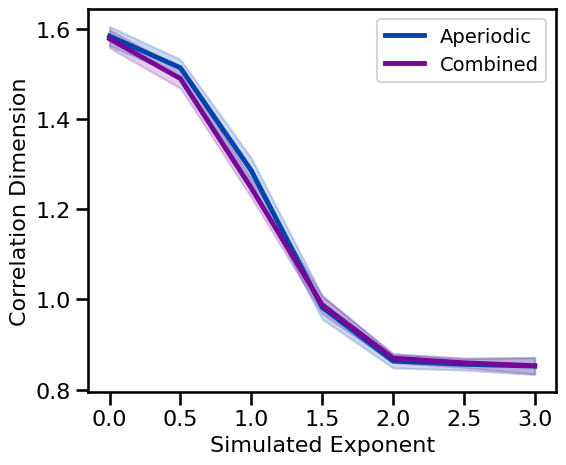

In [11]:
# Plot correlation dimension estimates across aperiodic variations
plot_ap_sims(cd_sims_exp, cd_sims_exp_var, cd_sims_comb, cd_sims_comb_var,
             'Correlation Dimension', save_fig=SAVE_FIG, file_name='cd_ap' + EXT, file_path=FIGPATH)

### Correlation Dimension: Periodic Variations

In [12]:
# Run simulations calculating correlation dimension across oscillation frequency
cd_sims_freq, cd_sims_freq_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, correlation_dimension, CD_PARAMS, 'update_freq', FREQS, N_SIMS2)

In [13]:
# Run simulations calculating correlation dimension across oscillation power
cd_sims_pow, cd_sims_pow_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, correlation_dimension, CD_PARAMS, 'update_pow', POWERS, N_SIMS2)

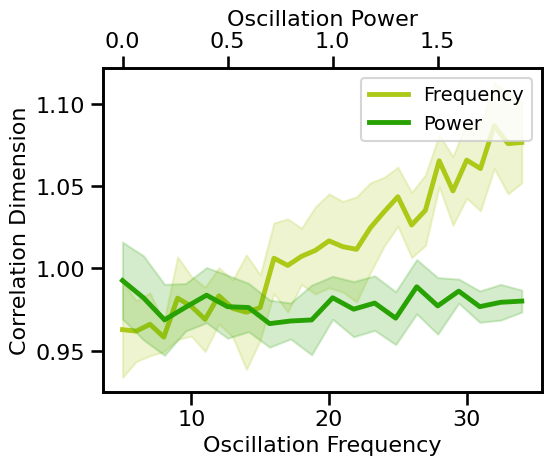

In [14]:
# Plot correlation dimension estimates across periodic variations
plot_pe_sims(cd_sims_freq, cd_sims_freq_var, cd_sims_pow, cd_sims_pow_var,
             'Correlation Dimension', save_fig=SAVE_FIG, file_name='cd_pe' + EXT, file_path=FIGPATH)

### Correlation Dimension: Knee Variations

In [15]:
# Run simulations calculating correlation dimension across timescales
cd_sims_knee, cd_sims_knee_var = run_sims(\
    sim_synaptic_current, SIM_PARAMS_KNEE, correlation_dimension, CD_PARAMS, 'update_knee', KNEES, N_SIMS2)

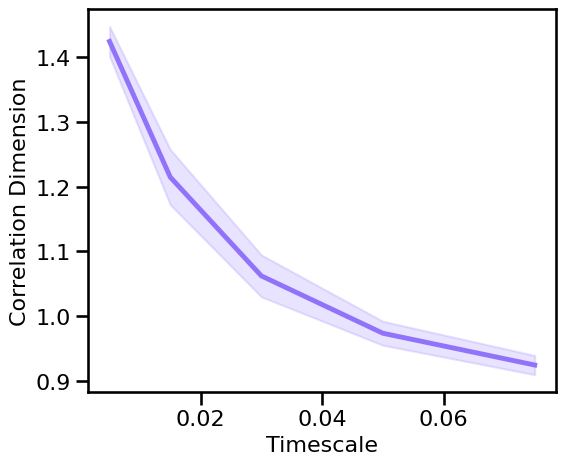

In [16]:
# Plot correlationl dimension across different timescales
plot_sims(KNEES, cd_sims_knee, cd_sims_knee_var,
          'Timescale', 'Correlation Dimension', COLORS['KN'],
          save_fig=SAVE_FIG, file_name='cd_knee' + EXT, file_path=FIGPATH)

### Correlation Dimension: Peak Variations

In [17]:
# Run simulations calculating correlation dimension across peak bandwidths (sims from file)
cd_sims_bw, cd_sims_bw_var = run_sims_load(\
    SIMPATH / 'ts_sims_comb_bw', correlation_dimension, CD_PARAMS, N_SIMS2)

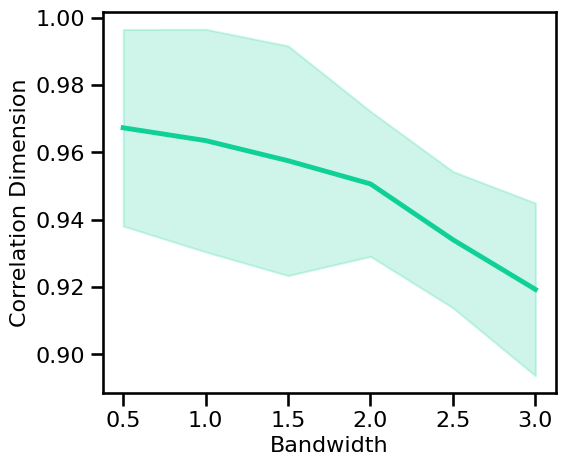

In [18]:
# Plot correlation dimension across peak bandwidth
plot_sims(BWS, cd_sims_bw, cd_sims_bw_var,
          'Bandwidth', 'Correlation Dimension', COLORS['BW'],
          save_fig=SAVE_FIG, file_name='cd_bw' + EXT, file_path=FIGPATH)

## Fractal Dimension Measures

Fractal dimension measures are measures of the roughness, or complexity, of a shape.

In [19]:
# Check Fractal Dimension measure parameters
print(HFD_PARAMS)
print(KFD_PARAMS)
print(PFD_PARAMS)

{}
{}
{}


### Calculate Fractal Dimension on Example Signals

Calculate measures of fractal dimension on time series. 

In [20]:
# Check Higuchi fractal dimension measures on example signals
print('Higuchi fractal dimension:')
print('  powerlaw: \t {:1.4f} \t {:1.2f}'.format(higuchi_fd(SIG_AP), convert_exponent_hfd(EXP)))
print('  osc:      \t {:1.4f}'.format(higuchi_fd(SIG_OSC)))
print('  combined: \t {:1.4f}'.format(higuchi_fd(SIG_COMB)))
print('  knee:     \t {:1.4f}'.format(higuchi_fd(SIG_KN)))

Higuchi fractal dimension:
  powerlaw: 	 1.6540 	 1.75
  osc:      	 1.1116
  combined: 	 1.4974
  knee:     	 1.7770


In [21]:
# Check Katz fractal dimension measures on example signals
print('Katz fractal dimension:')
print('  powerlaw: \t {:1.4f}'.format(katz_fd(SIG_AP)))
print('  osc:      \t {:1.4f}'.format(katz_fd(SIG_OSC)))
print('  combined: \t {:1.4f}'.format(katz_fd(SIG_COMB)))
print('  knee:     \t {:1.4f}'.format(katz_fd(SIG_KN)))

Katz fractal dimension:
  powerlaw: 	 2.5049
  osc:      	 4.8686
  combined: 	 3.4940
  knee:     	 4.0149


In [22]:
# Check Petrosian fractal dimension measures on example signals
print('Petrosian fractal dimension:')
print('  powerlaw: \t {:1.4f}'.format(petrosian_fd(SIG_AP)))
print('  osc:      \t {:1.4f}'.format(petrosian_fd(SIG_OSC)))
print('  combined: \t {:1.4f}'.format(petrosian_fd(SIG_COMB)))
print('  knee:     \t {:1.4f}'.format(petrosian_fd(SIG_KN)))

Petrosian fractal dimension:
  powerlaw: 	 1.0215
  osc:      	 1.0035
  combined: 	 1.0206
  knee:     	 1.0230


### Fractal Dimension: Aperiodic Variations

In [23]:
# Calculate the expected Higuchi fractal dimension value for each powerlaw exponent
exps_for_expected = [val for val in EXPS if val != -0.5]
expected_hfd = [convert_exponent_hfd(exp) for exp in exps_for_expected]
expected_hfd.insert(5, None)

In [24]:
# Run simulations calculating fractal dimension across exponents
hfd_sims_exp, hfd_sims_exp_var = run_sims(\
    sim_powerlaw, SIM_PARAMS_AP, higuchi_fd, HFD_PARAMS, 'update_exp', EXPS, N_SIMS)
kfd_sims_exp, kfd_sims_exp_var = run_sims(\
    sim_powerlaw, SIM_PARAMS_AP, katz_fd, KFD_PARAMS, 'update_exp', EXPS, N_SIMS)
pfd_sims_exp, pfd_sims_exp_var = run_sims(\
    sim_powerlaw, SIM_PARAMS_AP, petrosian_fd, PFD_PARAMS, 'update_exp', EXPS, N_SIMS)

In [25]:
# Run simulations calculating fractal dimension across exponents with an oscillation
hfd_sims_comb, hfd_sims_comb_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, higuchi_fd, HFD_PARAMS, 'update_comb_exp', EXPS, N_SIMS)
kfd_sims_comb, kfd_sims_comb_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, katz_fd, KFD_PARAMS, 'update_comb_exp', EXPS, N_SIMS)
pfd_sims_comb, pfd_sims_comb_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, petrosian_fd, PFD_PARAMS, 'update_comb_exp', EXPS, N_SIMS)

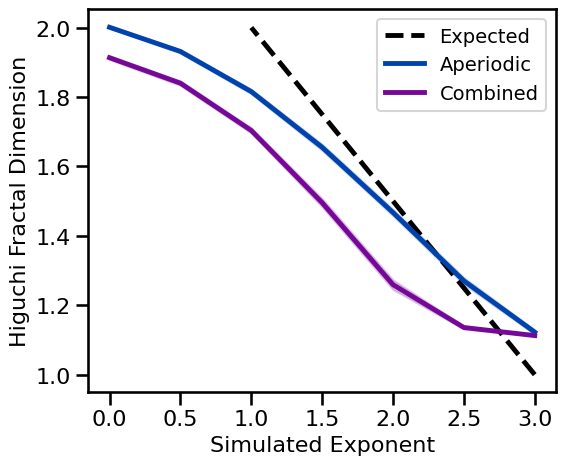

In [26]:
# Plot Higuchi fractal dimension estimates across aperiodic variations
plot_ap_sims(hfd_sims_exp, hfd_sims_exp_var, hfd_sims_comb, hfd_sims_comb_var,
             'Higuchi Fractal Dimension', expected=expected_hfd,
             save_fig=SAVE_FIG, file_name='hfd_ap' + EXT, file_path=FIGPATH)

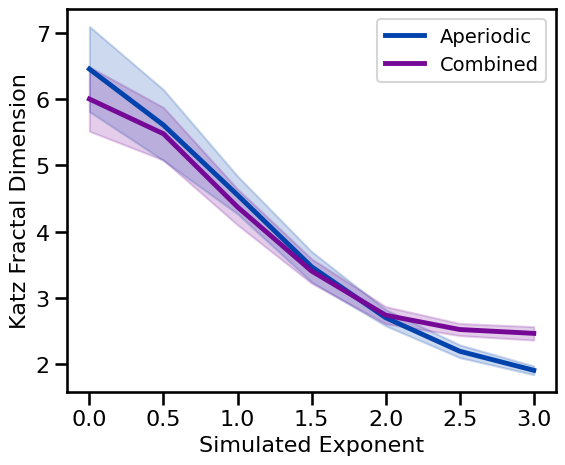

In [27]:
# Plot Katz fractal dimension estimates across aperiodic variations
plot_ap_sims(kfd_sims_exp, kfd_sims_exp_var, kfd_sims_comb, kfd_sims_comb_var,
             'Katz Fractal Dimension',
             save_fig=SAVE_FIG, file_name='kfd_ap' + EXT, file_path=FIGPATH)

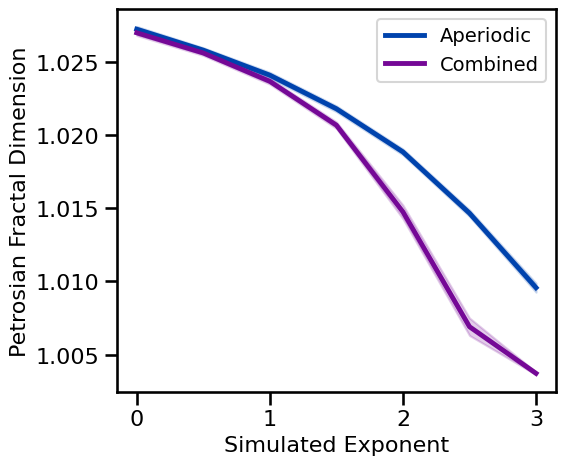

In [28]:
# Plot Petrosian fractal dimension estimates across aperiodic variations
plot_ap_sims(pfd_sims_exp, pfd_sims_exp_var, pfd_sims_comb, pfd_sims_comb_var,
             'Petrosian Fractal Dimension',
             save_fig=SAVE_FIG, file_name='pfd_ap' + EXT, file_path=FIGPATH)

### Fractal Dimension: Periodic Variations

In [29]:
# Run simulations calculating fractal dimension across oscillation frequency
hfd_sims_freq, hfd_sims_freq_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, higuchi_fd, HFD_PARAMS, 'update_freq', FREQS, N_SIMS)
kfd_sims_freq, kfd_sims_freq_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, katz_fd, KFD_PARAMS, 'update_freq', FREQS, N_SIMS)
pfd_sims_freq, pfd_sims_freq_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, petrosian_fd, PFD_PARAMS, 'update_freq', FREQS, N_SIMS)

In [30]:
# Run simulations calculating fractal dimension across oscillation power
hfd_sims_pow, hfd_sims_pow_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, higuchi_fd, HFD_PARAMS, 'update_pow', POWERS, N_SIMS)
kfd_sims_pow, kfd_sims_pow_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, katz_fd, KFD_PARAMS, 'update_pow', POWERS, N_SIMS)
pfd_sims_pow, pfd_sims_pow_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, petrosian_fd, PFD_PARAMS, 'update_pow', POWERS, N_SIMS)

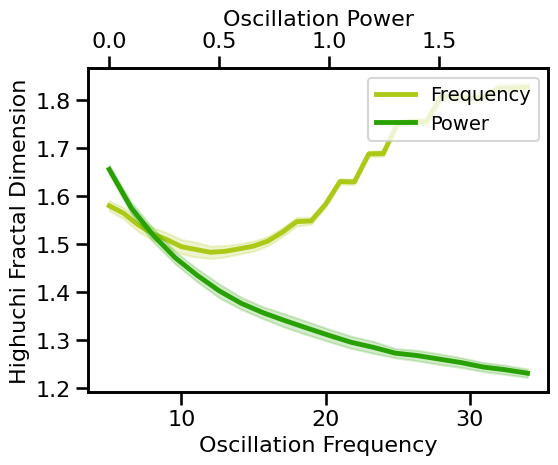

In [31]:
# Plot Higuchi fractal dimension estimates across periodic variations
plot_pe_sims(hfd_sims_freq, hfd_sims_freq_var, hfd_sims_pow, hfd_sims_pow_var,
             'Highuchi Fractal Dimension', save_fig=SAVE_FIG, file_name='hfd_pe' + EXT, file_path=FIGPATH)

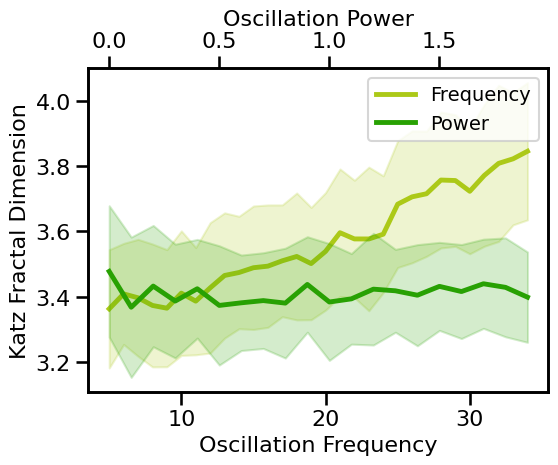

In [32]:
# Plot Katz fractal dimension estimates across periodic variations
plot_pe_sims(kfd_sims_freq, kfd_sims_freq_var, kfd_sims_pow, kfd_sims_pow_var,
             'Katz Fractal Dimension', save_fig=SAVE_FIG, file_name='kfd_pe' + EXT, file_path=FIGPATH)

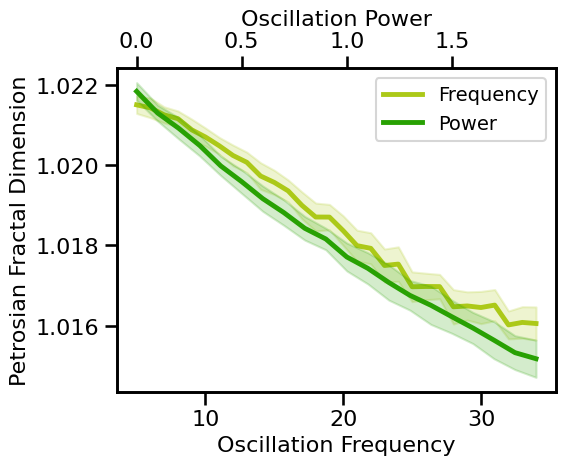

In [33]:
# Plot Petrosian fractal dimension estimates across periodic variations
plot_pe_sims(pfd_sims_freq, pfd_sims_freq_var, pfd_sims_pow, pfd_sims_pow_var,
             'Petrosian Fractal Dimension', save_fig=SAVE_FIG, file_name='pfd_pe' + EXT, file_path=FIGPATH)

### Fractal Dimension: Knee Variations

In [34]:
# Run simulations calculating fractal dimension across timescales
hfd_sims_knee, hfd_sims_knee_var = run_sims(\
    sim_synaptic_current, SIM_PARAMS_KNEE, higuchi_fd, HFD_PARAMS, 'update_knee', KNEES, N_SIMS)
kfd_sims_knee, kfd_sims_knee_var = run_sims(\
    sim_synaptic_current, SIM_PARAMS_KNEE, katz_fd, KFD_PARAMS, 'update_knee', KNEES, N_SIMS)
pfd_sims_knee, pfd_sims_knee_var = run_sims(\
    sim_synaptic_current, SIM_PARAMS_KNEE, petrosian_fd, PFD_PARAMS, 'update_knee', KNEES, N_SIMS)

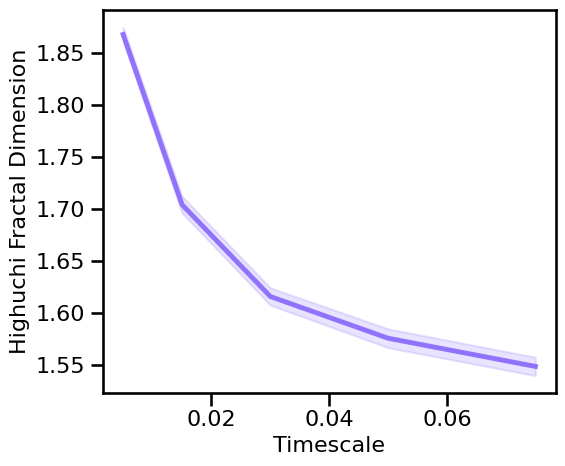

In [35]:
# Plot Higuchi fractal dimension across different timescales
plot_sims(KNEES, hfd_sims_knee, hfd_sims_knee_var,
          'Timescale', 'Highuchi Fractal Dimension', COLORS['KN'],
          save_fig=SAVE_FIG, file_name='hfd_knee' + EXT, file_path=FIGPATH)

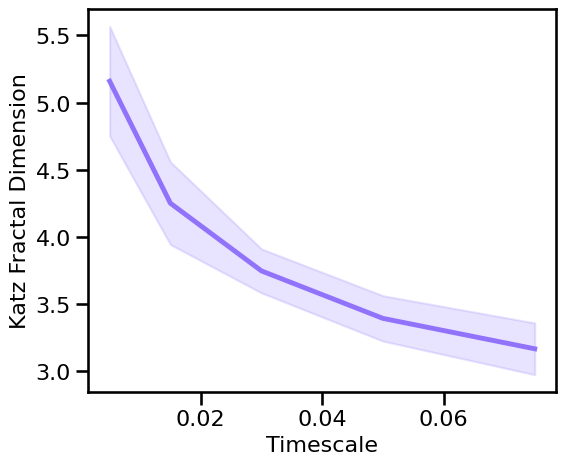

In [36]:
# Plot Katz fractal dimension across different timescales
plot_sims(KNEES, kfd_sims_knee, kfd_sims_knee_var, 
          'Timescale', 'Katz Fractal Dimension', COLORS['KN'],
          save_fig=SAVE_FIG, file_name='kfd_knee' + EXT, file_path=FIGPATH)

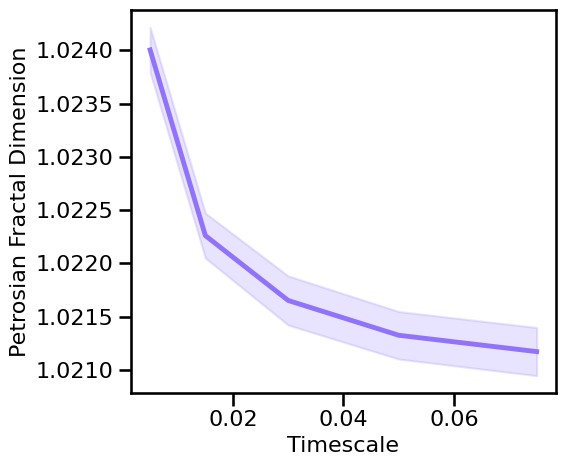

In [37]:
# Plot Petrosian fractal dimension across different timescales
plot_sims(KNEES, pfd_sims_knee, pfd_sims_knee_var,
          'Timescale', 'Petrosian Fractal Dimension', COLORS['KN'],
          save_fig=SAVE_FIG, file_name='pfd_knee' + EXT, file_path=FIGPATH)

### Fractal Dimension: Peak Variations

In [38]:
# Run simulations calculating fractal dimension across peak bandwidths (sims from file)
hfd_sims_bw, hfd_sims_bw_var = run_sims_load(\
    SIMPATH / 'ts_sims_comb_bw', higuchi_fd, HFD_PARAMS)
kfd_sims_bw, kfd_sims_bw_var = run_sims_load(\
    SIMPATH / 'ts_sims_comb_bw', katz_fd, KFD_PARAMS)
pfd_sims_bw, pfd_sims_bw_var = run_sims_load(\
    SIMPATH / 'ts_sims_comb_bw', petrosian_fd, PFD_PARAMS)

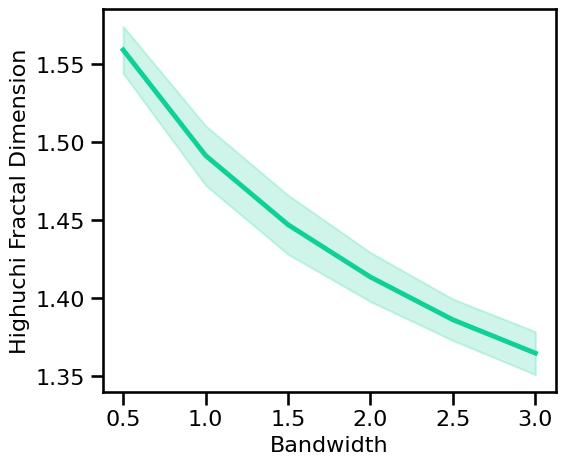

In [39]:
# Plot Higuchi fractal dimension across peak bandwidth
plot_sims(BWS, hfd_sims_bw, hfd_sims_bw_var,
          'Bandwidth', 'Highuchi Fractal Dimension', COLORS['BW'],
          save_fig=SAVE_FIG, file_name='hfd_bw' + EXT, file_path=FIGPATH)

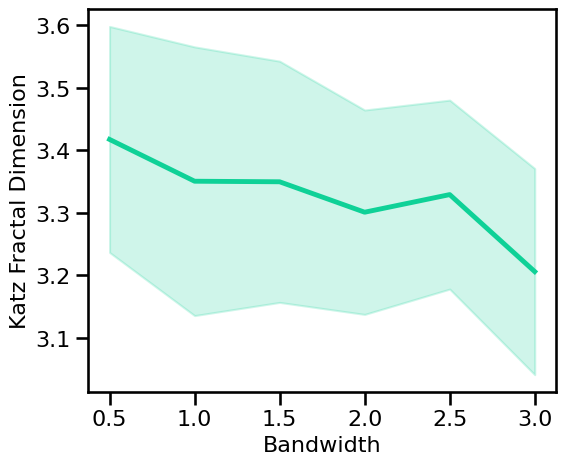

In [40]:
# Plot Katz fractal dimension across peak bandwidth
plot_sims(BWS, kfd_sims_bw, kfd_sims_bw_var,
          'Bandwidth', 'Katz Fractal Dimension', COLORS['BW'],
          save_fig=SAVE_FIG, file_name='kfd_bw' + EXT, file_path=FIGPATH)

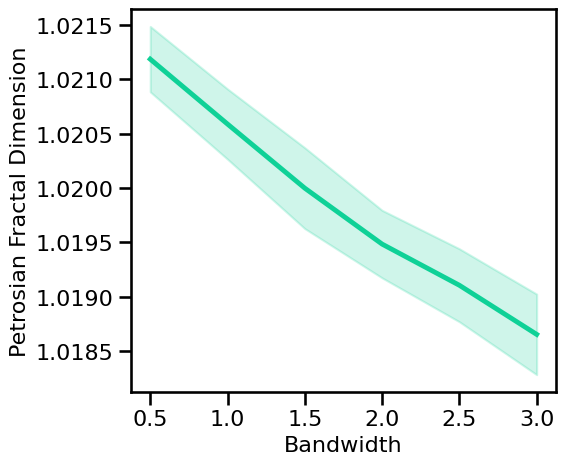

In [41]:
# Plot Petrosian fractal dimension across peak bandwidth
plot_sims(BWS, pfd_sims_bw, pfd_sims_bw_var,
          'Bandwidth', 'Petrosian Fractal Dimension', COLORS['BW'],
          save_fig=SAVE_FIG, file_name='pfd_bw' + EXT, file_path=FIGPATH)

## Conclusions

Overall, we can see the following patterns in these simulations:

Fractal dimension measures (general patterns, across all measures):
- increase with decreasing aperiodic exponent, non-linearly
- decreases with increasing oscillations frequency or power, mixed patterns